In [1]:
# Inspired by 3Blue1Brown's YouTube video
# How (and why) to raise e to the power of a matrix | DE6
# https://www.youtube.com/watch?v=O85OWBJ2ayo

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

theta = sp.Symbol('theta')

The imaginary unit as a matrix of real numbers

$i = \begin{bmatrix}
    Re(i)  & -Im(i) \\
    Im(i)  &  Re(i) \\
\end{bmatrix} = \begin{bmatrix}
    0  & -1 \\
    1  &  0 \\
\end{bmatrix}$

In [2]:
# Imaginary unit as 2x2 rotation matrix

i = sp.Matrix([[ 0,-1],
               [ 1, 0]])

$e^{iθ} = \begin{bmatrix}
      \cosh(iθ)  & i\sinh(iθ) \\
    -i\sinh(iθ)  &  \cosh(iθ) \\
\end{bmatrix} = \begin{bmatrix}
    \cos(θ)  & -\sin(θ) \\
    \sin(θ)  &  \cos(θ) \\
\end{bmatrix}$

In [3]:
# e^(iθ) yields a matrix of hyperbolic functions

sp.exp(i*theta)

Matrix([
[     exp(I*theta)/2 + exp(-I*theta)/2, I*exp(I*theta)/2 - I*exp(-I*theta)/2],
[-I*exp(I*theta)/2 + I*exp(-I*theta)/2,     exp(I*theta)/2 + exp(-I*theta)/2]])

In [4]:
# Hyperbolic functions with complex arguments simplify to trignometric functions

sp.exp(i*theta).simplify()

Matrix([
[cos(theta), -sin(theta)],
[sin(theta),  cos(theta)]])

In [5]:
# Hyperbolic functions with complex arguments simplify to trignometric functions

exp_i8_hyp = sp.Matrix([
    [      sp.cosh(sp.I*theta), sp.I*sp.sinh(sp.I*theta)],
    [-sp.I*sp.sinh(sp.I*theta),      sp.cosh(sp.I*theta)]
])

exp_i8_trig = sp.Matrix([
    [            sp.cos(theta),           -sp.sin(theta)],
    [            sp.sin(theta),            sp.cos(theta)]
])

exp_i8_hyp - exp_i8_trig # The difference of equivalent matrices is zero

Matrix([
[0, 0],
[0, 0]])

In [6]:
# i*1 = i

one = sp.Matrix([[1,0],
                 [0,1]]) # Identity matrix

i@one

Matrix([
[0, -1],
[1,  0]])

$i = \begin{bmatrix}
    Re(i) \\
    Im(i) \\
\end{bmatrix} = \begin{bmatrix}
    0 \\
    1 \\
\end{bmatrix}$

In [7]:
# i*1 = i

one = sp.Matrix([[1],
                 [0]])

i@one # Imaginary unit as 2x1 vector

Matrix([
[0],
[1]])

$e^{iπ} + 1 = 0$

In [8]:
# Euler's identity: e^(iπ) + 1 = 0

sp.exp(sp.I*sp.pi) + 1

0

In [9]:
# Euler's formula: e^(iθ) = cos(θ) + isin(θ)

theta = sp.Symbol('theta')

Euler_formula = sp.Eq(sp.exp(sp.I*theta), sp.cos(theta) + sp.I*sp.sin(theta))
Euler_formula

Eq(exp(I*theta), I*sin(theta) + cos(theta))

In [10]:
# Roots of unity

roots = []
for t in [0, sp.pi/2, sp.pi, 3*sp.pi/2]: # Anticlockwise right-angled rotations
    roots.append(Euler_formula.rhs.subs({theta:t}))
sp.Array(roots)

[1, I, -1, -I]

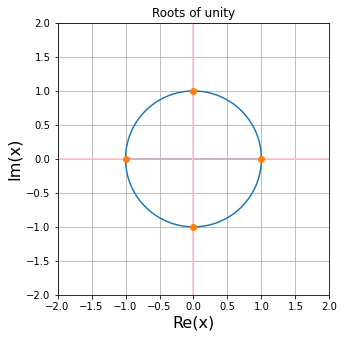

In [11]:
# Plot roots of unity on Argand plane

x = np.linspace(-1,1,10000)
y_uppersemi = np.sqrt((-1)**2 + 0**2 - x**2)
y_lowersemi = -y_uppersemi
x_circle = np.hstack([x, x])
y_circle = np.hstack([y_uppersemi, y_lowersemi])

plt.figure(figsize=(5,5))
ax = plt.gca()
ax.set_aspect(1)
plt.plot(x_circle,y_circle)
plt.axhline(0, color='pink')
plt.axvline(0, color='pink')
plt.ylabel('Im(x)', fontsize=16)
plt.xlabel('Re(x)', fontsize=16)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid()
plt.title('Roots of unity')
plt.plot([sp.re(x) for x in roots],[sp.im(x) for x in roots],linestyle = "",marker='o')
plt.show()